In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression


In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv(r'C:\Documents\OneDrive\Desktop\Data_Science notes\weather_data.csv')
print(f"✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(df['hours_sunlight'].min(), df['hours_sunlight'].max())


✓ Dataset loaded successfully!
Dataset shape: (49, 3)
4.3 11.2


In [4]:
print("\n Weather-Data Overview:")
df.head()


 Weather-Data Overview:


,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4


In [5]:
print("\n Weather Info:")
print(df.info())


 Weather Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hours_sunlight     49 non-null     float64
 1   humidity_level     49 non-null     int64  
 2   daily_temperature  49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB
None


In [6]:
print(f"\n🔍 Missing values: {df.isnull().sum()}")


🔍 Missing values: hours_sunlight       0
humidity_level       0
daily_temperature    0
dtype: int64


In [7]:
df.head(11)

,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4
5,11.0,60,24.0
6,5.5,85,16.0
7,9.8,68,21.7
8,7.2,77,19.0
9,6.0,88,17.0


In [8]:
exclude_cols = ['humidity_level']

In [9]:

initial_feature_candidates = [c for c in df.columns if c not in exclude_cols]
feature_cols = [c for c in initial_feature_candidates if c != 'daily_temperature']
X = df[feature_cols].copy()
y = df['daily_temperature']

In [10]:
print(f"✓ Features selected: {len(feature_cols)} columns")
print(f"✓ Target variable: daily_temperature")

✓ Features selected: 1 columns
✓ Target variable: daily_temperature


In [11]:
feature_cols

['hours_sunlight']

In [12]:
print("\n📋 Features used in model:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")


📋 Features used in model:
 1. hours_sunlight


In [13]:
# Basic statistics
print("\nTarget Variable (daily_temperature) Statistics:")
print(f"Mean: {y.mean():.2f}")
print(f"Median: {y.median():.2f}")
print(f"Std Dev: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")


Target Variable (daily_temperature) Statistics:
Mean: 19.69
Median: 19.40
Std Dev: 2.46
Min: 15.00
Max: 24.30


In [14]:
print("\n📌 Top 10 Features Correlated with Final Score:")
# Numeric columns only
numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()['daily_temperature'].sort_values(ascending=False)
print(correlations.head(11)[1:])



📌 Top 10 Features Correlated with Final Score:
hours_sunlight    0.992138
humidity_level   -0.980854
Name: daily_temperature, dtype: float64


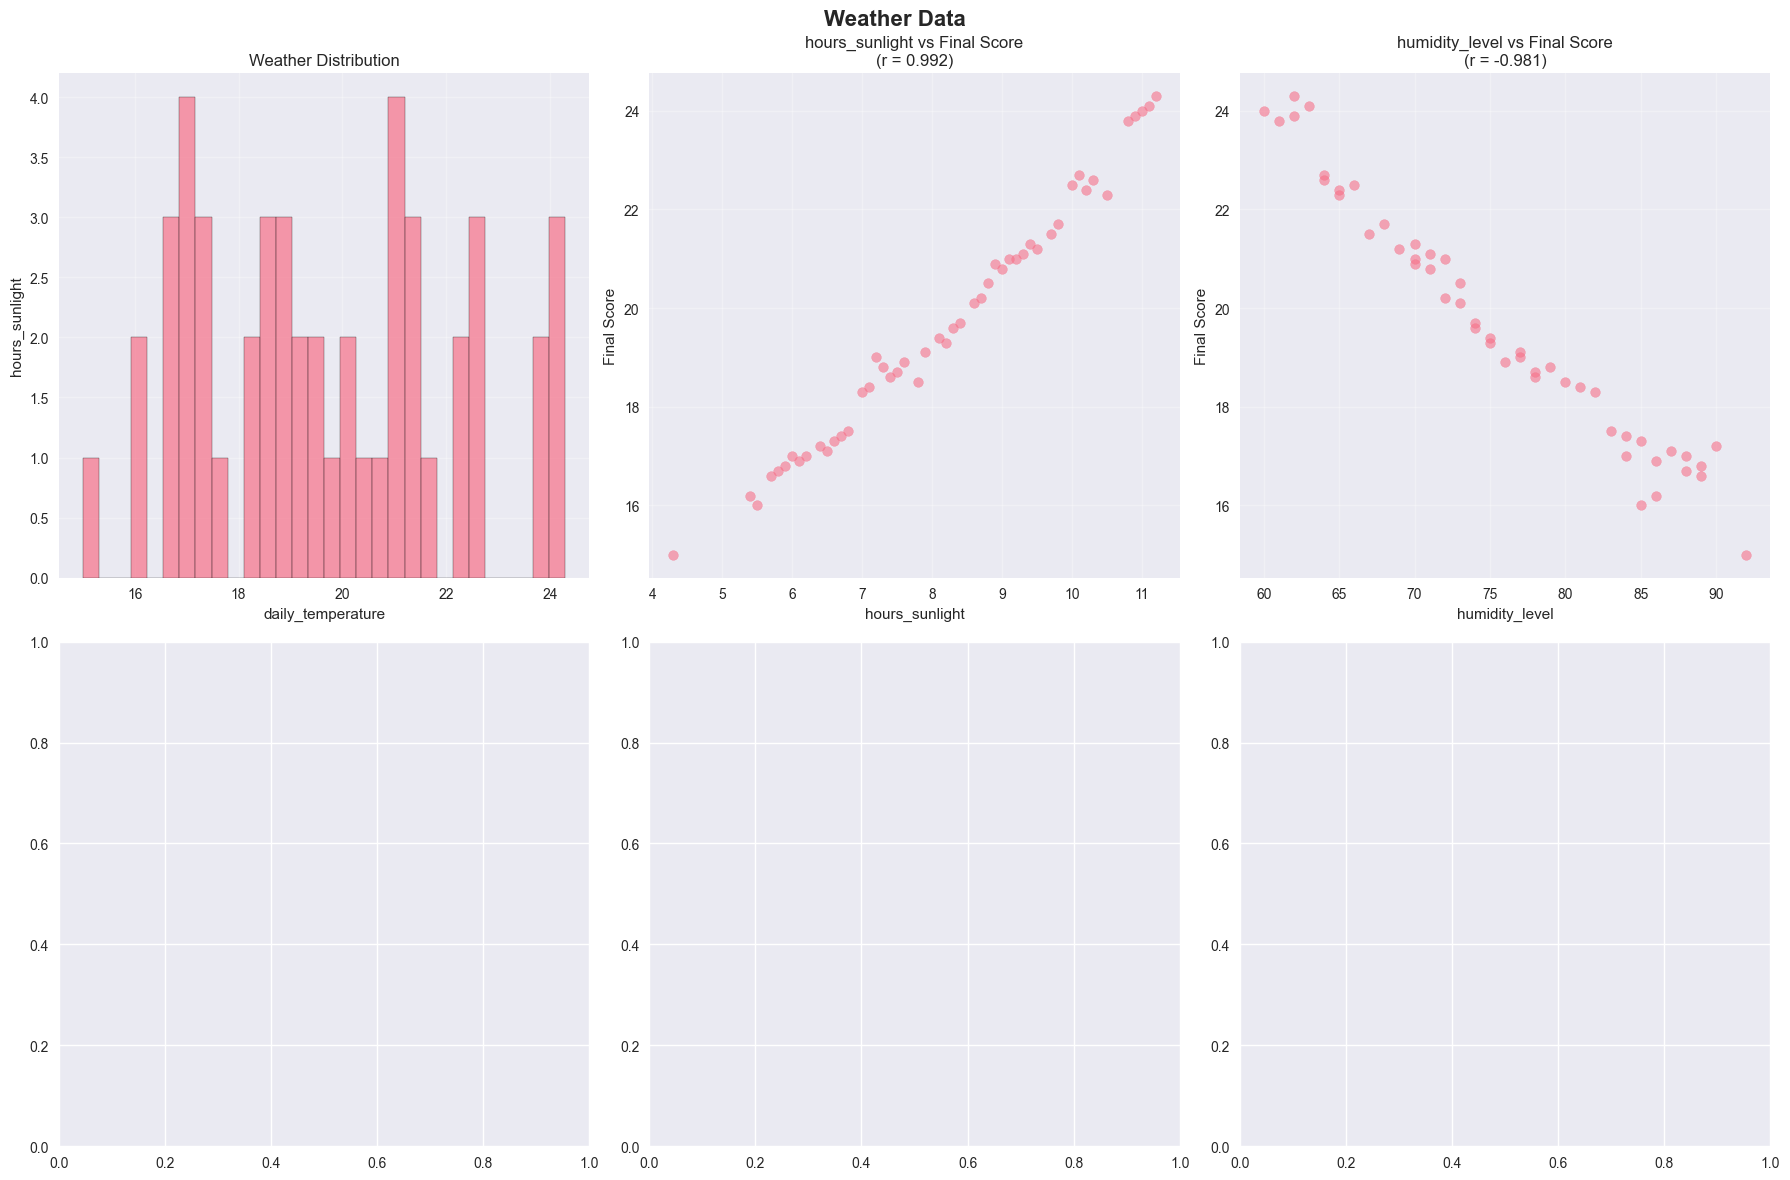

In [15]:
# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Weather Data', fontsize=16, fontweight='bold')

# Final Score distribution
axes[0, 0].hist(y, bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Weather Distribution')
axes[0, 0].set_xlabel('daily_temperature')
axes[0, 0].set_ylabel('hours_sunlight')
axes[0, 0].grid(True, alpha=0.3)

top_features = correlations.head(6)[1:].index   # Top 5 excluding Final_Score itself
for i, feature in enumerate(top_features):
    if i < 5: 
        row = i // 3
        col = (i + 1) % 3

        if row == 0 and col == 0:
            continue  # First plot already used (hist)

        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Final Score\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Final Score')
        axes[row, col].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




🔗 Top 10 Features for Heatmap: ['hours_sunlight', 'humidity_level']


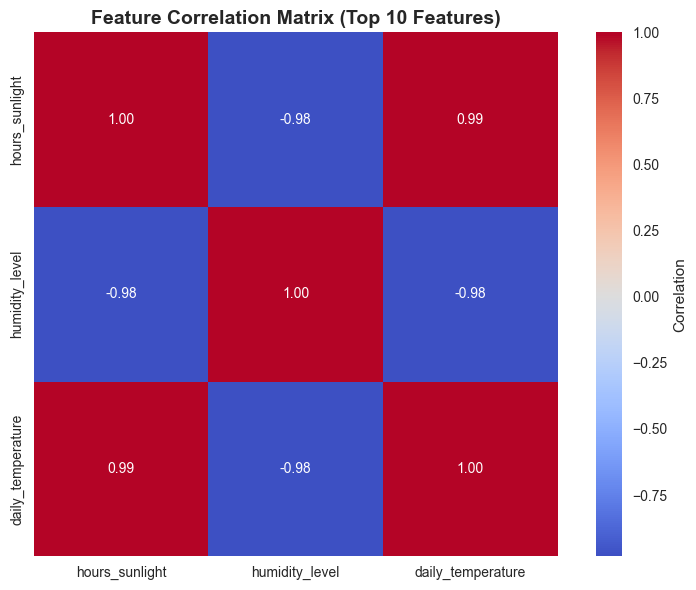

In [16]:
# Feature correlation heatmap
plt.figure(figsize=(8, 6))
important_features = correlations.head(11)[1:].index[:10]
print(f"\n🔗 Top 10 Features for Heatmap: {list(important_features)}")
corr_matrix = df[list(important_features) + ['daily_temperature']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix (Top 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


📊 Data Split:
Training set: 39 samples
Test set: 10 samples


In [18]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64'])), columns=X_train.select_dtypes(include=['int64', 'float64']).columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test.select_dtypes(include=['int64', 'float64'])), columns=X_test.select_dtypes(include=['int64', 'float64']).columns)

In [19]:
X_train_scaled

,hours_sunlight
0,-2.246412
1,-0.054718
2,1.156481
3,-0.573804
4,-1.035213
5,-1.554298
6,1.214157
7,-1.438946
8,0.002958
9,1.733242


In [20]:
print("✓ Features scaled using StandardScaler")

# Feature selection (optional - select top K features)
selector = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

X_test_selected = selector.transform(X_test_scaled)
selected_features = X_train_scaled.columns[selector.get_support()]

print(f"\n🎯 Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

✓ Features scaled using StandardScaler

🎯 Feature Selection: Top 1 features selected
Selected features: ['hours_sunlight']


c:\Users\dhanu\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=15 is greater than n_features=1. All the features will be returned.
  warnings.warn(


In [21]:
# Create and train the linear regression model
print("\n🤖 Training Linear Regression Model:")
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("✓ Model trained successfully")


🤖 Training Linear Regression Model:
✓ Model trained successfully


In [22]:
# Make predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [23]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print(f"\n📊 Training Set Performance:")
print(f"R² Score: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"MAPE: {mape_train:.2f}%")

train_metrics = {'R2': r2_train, 'RMSE': rmse_train, 'MAE': mae_train, 'MAPE': mape_train}


📊 Training Set Performance:
R² Score: 0.9831
RMSE: 0.31
MAE: 0.25
MAPE: 1.27%


In [24]:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f"\n📊 Test Set Performance:")
print(f"R² Score: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")

test_metrics = {'R2': r2_test, 'RMSE': rmse_test, 'MAE': mae_test, 'MAPE': mape_test}


📊 Test Set Performance:
R² Score: 0.9872
RMSE: 0.30
MAE: 0.24
MAPE: 1.19%


In [25]:
# Check for overfitting
print(f"\n Overfitting Check:")
print(f"R² difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("✓ Model appears to generalize well (low overfitting)")
else:
    print("⚠️ Potential overfitting detected")


 Overfitting Check:
R² difference (Train - Test): -0.0041
✓ Model appears to generalize well (low overfitting)


In [26]:
 #Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n🎯 Feature Importance (Top 10):")
print(feature_importance.head(10))


🎯 Feature Importance (Top 10):
          Feature  Coefficient  Abs_Coefficient
0  hours_sunlight     2.355568         2.355568


In [27]:
# Model interpretation
print(f"\n📋 Model Interpretation:")
print(f"Intercept: {model.intercept_:.2f}")


📋 Model Interpretation:
Intercept: 19.71


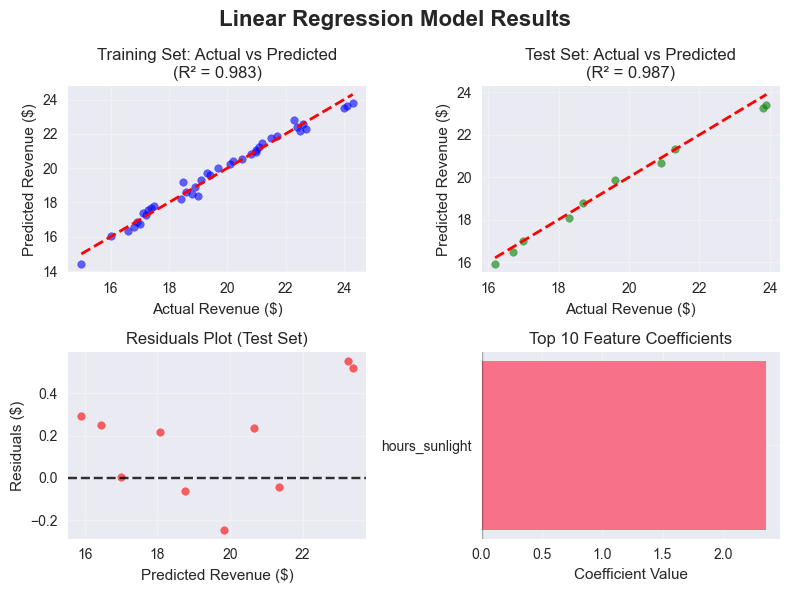

In [28]:
# Visualization of results
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=30)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Revenue ($)')
axes[0, 0].set_ylabel('Predicted Revenue ($)')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\n(R² = {train_metrics["R2"]:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6, color='green', s=30)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Revenue ($)')
axes[0, 1].set_ylabel('Predicted Revenue ($)')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\n(R² = {test_metrics["R2"]:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.6, color='red', s=30)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_xlabel('Predicted Revenue ($)')
axes[1, 0].set_ylabel('Residuals ($)')
axes[1, 0].set_title('Residuals Plot (Test Set)')
axes[1, 0].grid(True, alpha=0.3)

# Feature importance
top_features_plot = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features_plot)), top_features_plot['Coefficient'])
axes[1, 1].set_yticks(range(len(top_features_plot)))
axes[1, 1].set_yticklabels(top_features_plot['Feature'])
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
with open("weather_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("weather-scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model & Scaler saved successfully")


✅ Model & Scaler saved successfully
